In [207]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
quiver_args = dict(angles='xy', scale_units='xy', scale=1)

In [208]:
def plt_basics(xlim=None, ylim=None, figsize=None, set_aspect=True, tick=None):
  if figsize:
    plt.figure(figsize=figsize)

  if set_aspect:
    plt.gca().set_aspect('equal', adjustable='box')

  plt.axhline(0, color='black', linewidth=0.5)
  plt.axvline(0, color='black', linewidth=0.5)
  plt.grid(True)

  if xlim:
    plt.xlim(xlim)
  if ylim:
    plt.ylim(ylim)

  if tick:
    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(tick))
    ax.yaxis.set_major_locator(MultipleLocator(tick))

In [209]:
def plt_vector(tail, head):
  plt.quiver(*tail, *head, **quiver_args)


def plt_line(start, end, style='g--', alpha=0.5):
  plt.plot([start[0], end[0]], [start[1], end[1]], style, alpha=alpha)

In [210]:
X = np.array([
    [1, 2],
    [1, 4],
    [2, 2.5],
    [3, 5],
    [4, 2],
    [4, 10],
    [5, 10],
    [7, 4]
]).T

In [211]:
X[0]  # coefficients for i vector
X[1]  # coefficients for j vector

array([1., 1., 2., 3., 4., 4., 5., 7.])

array([ 2. ,  4. ,  2.5,  5. ,  2. , 10. , 10. ,  4. ])

In [212]:
w1 = np.array([1, 0])  # standard i vector
w2 = np.array([0, 1])  # standard j vector

w1 = np.array([1, 1])
w2 = np.array([-w1[1], w1[0]])

In [213]:
c1 = X.T @ w1
c2 = X.T @ w2

c1  # coefficients for w1 vector
c2  # coefficients for w2 vector

array([ 3. ,  5. ,  4.5,  8. ,  6. , 14. , 15. , 11. ])

array([ 1. ,  3. ,  0.5,  2. , -2. ,  6. ,  5. , -3. ])

In [214]:
w1_proxies = w1.reshape(-1, 1) @ c1.reshape(-1, 1).T  # yellow dots on w1
w2_proxies = w2.reshape(-1, 1) @ c2.reshape(-1, 1).T  # yellow dots on w2

w1_proxies
w2_proxies

array([[ 3. ,  5. ,  4.5,  8. ,  6. , 14. , 15. , 11. ],
       [ 3. ,  5. ,  4.5,  8. ,  6. , 14. , 15. , 11. ]])

array([[-1. , -3. , -0.5, -2. ,  2. , -6. , -5. ,  3. ],
       [ 1. ,  3. ,  0.5,  2. , -2. ,  6. ,  5. , -3. ]])

In [215]:
X[0] = c1
X[1] = c2
X

array([[ 3. ,  5. ,  4.5,  8. ,  6. , 14. , 15. , 11. ],
       [ 1. ,  3. ,  0.5,  2. , -2. ,  6. ,  5. , -3. ]])

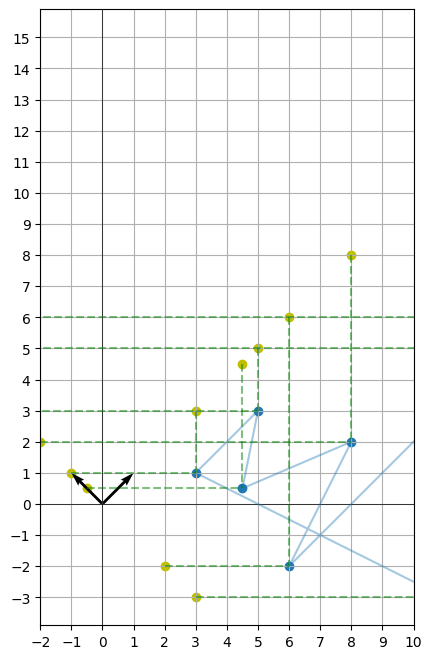

In [216]:
plt_basics(xlim=(-2, 10), tick=1, figsize=(8, 8))

_ = plt.scatter(*X)
_ = plt.plot(*np.column_stack((X, X[:, 0])), alpha=0.4)
_ = plt.scatter(*w1_proxies, color='y')
_ = plt.scatter(*w2_proxies, color='y')

plt_vector((0, 0), w1)
plt_vector((0, 0), w2)

for i, x in enumerate(X.T):
  plt_line(w1_proxies[:, i], x)
  plt_line(w2_proxies[:, i], x)

In [217]:
for i, x in enumerate(X.T, start=1):
  print(f"{i}-th sample:  w1 * {x[0]}   w2 * {x[1]}")

X.T

1-th sample:  w1 * 3.0   w2 * 1.0
2-th sample:  w1 * 5.0   w2 * 3.0
3-th sample:  w1 * 4.5   w2 * 0.5
4-th sample:  w1 * 8.0   w2 * 2.0
5-th sample:  w1 * 6.0   w2 * -2.0
6-th sample:  w1 * 14.0   w2 * 6.0
7-th sample:  w1 * 15.0   w2 * 5.0
8-th sample:  w1 * 11.0   w2 * -3.0


array([[ 3. ,  1. ],
       [ 5. ,  3. ],
       [ 4.5,  0.5],
       [ 8. ,  2. ],
       [ 6. , -2. ],
       [14. ,  6. ],
       [15. ,  5. ],
       [11. , -3. ]])